In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from mpl_toolkits.mplot3d import axes3d

from modules.cluster_coors import get_coors_from_cluster
from modules.cluster_graphs import draw_clusters_scatterplot

In [2]:
df = pd.read_csv('prepared_dataset/40_mV_OCO_sequences.csv')
df.head()

,o1,c,o2
0,0.002294,0.170213,0.059393
1,0.059393,0.031915,0.001020
2,0.001020,0.095745,0.032373
3,0.032373,0.031915,0.294927
4,0.294927,0.638298,0.023961


In [3]:
df.corr()

,o1,c,o2
o1,1.000000,-0.077009,0.191603
c,-0.077009,1.000000,-0.102534
o2,0.191603,-0.102534,1.000000


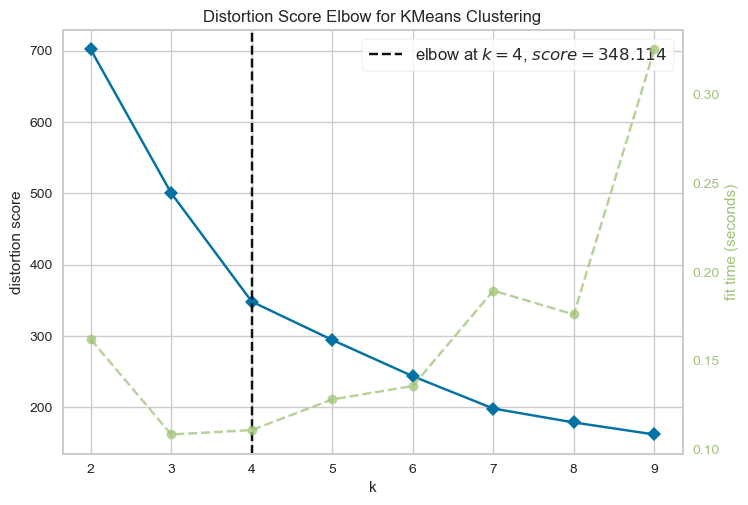

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
model = KMeans(init="k-means++", n_init=10)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(df) 
visualizer.show()

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=4, n_init=10))

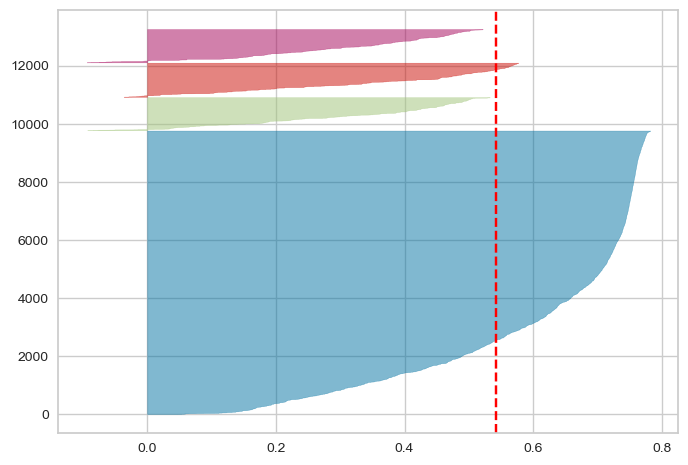

In [5]:
km = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=100)
visualizer = SilhouetteVisualizer(km, colors="yellowbrick")
visualizer.fit(df)

In [6]:
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(df)

/Users/aleksanderbies/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
kmeans.cluster_centers_

array([[0.06128748, 0.06742761, 0.06273839],
       [0.1282973 , 0.06637479, 0.50686315],
       [0.06337222, 0.50883321, 0.04843809],
       [0.49818806, 0.06573675, 0.12372698]])

In [8]:
centroids = kmeans.cluster_centers_
y_means = kmeans_labels

In [9]:
X = np.array(df)
X[y_means == 0]

array([[0.00229416, 0.17021277, 0.05939332],
       [0.05939332, 0.03191489, 0.00101963],
       [0.00101963, 0.09574468, 0.03237318],
       ...,
       [0.06998158, 0.05343511, 0.04788214],
       [0.04788214, 0.02290076, 0.21546961],
       [0.21546961, 0.03053435, 0.106814  ]])

In [10]:
df['Clusters'] = y_means

In [11]:
values = df.values

In [12]:
X = np.array(df)
X[y_means == 0]

array([[0.00229416, 0.17021277, 0.05939332, 0.        ],
       [0.05939332, 0.03191489, 0.00101963, 0.        ],
       [0.00101963, 0.09574468, 0.03237318, 0.        ],
       ...,
       [0.06998158, 0.05343511, 0.04788214, 0.        ],
       [0.04788214, 0.02290076, 0.21546961, 0.        ],
       [0.21546961, 0.03053435, 0.106814  , 0.        ]])

In [13]:
cluster_0, cluster_1, cluster_2, cluster_3 = [], [], [], []

In [14]:
for i in values:
    if i[3] == 0:
        cluster_0.append(i)
    elif i[3] == 1:
        cluster_1.append(i)
    elif i[3] == 2:
        cluster_2.append(i),
    elif i[3] == 3:
        cluster_3.append(i)

In [15]:
cluster_0 = np.delete(cluster_0, 3, axis=1)
len(cluster_0)

9761

In [16]:
cluster_1 = np.delete(cluster_1, 3, axis=1)
len(cluster_1)

1140

In [17]:
cluster_2 = np.delete(cluster_2, 3, axis=1)
len(cluster_2)

1177

In [18]:
cluster_3 = np.delete(cluster_3, 3, axis=1)
len(cluster_3)

1148

In [19]:
cluster_0_coors = get_coors_from_cluster(cluster_0)

In [20]:
cluster_1_coors = get_coors_from_cluster(cluster_1)

In [21]:
cluster_2_coors = get_coors_from_cluster(cluster_2)

In [22]:
cluster_3_coors = get_coors_from_cluster(cluster_3)

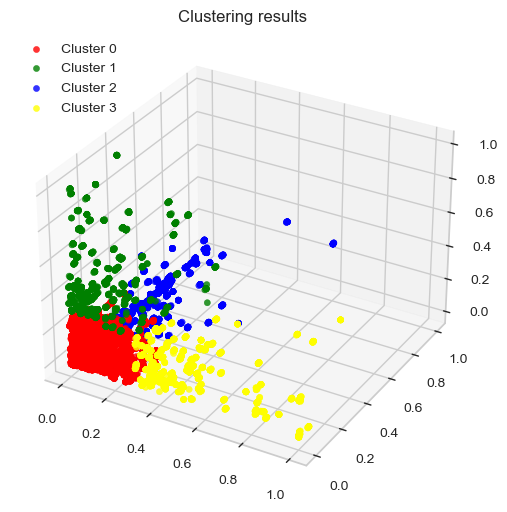

In [23]:
draw_clusters_scatterplot(cluster_0_coors, cluster_1_coors,
                          cluster_2_coors, cluster_3_coors)